# Assignment 1

First we need to import a few modules, execute the cell below:

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [2]:
def f(x):
    f = numpy.cos(x)
    return f

You can use the following cell to check that your code works for scalar arguments:

In [3]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [4]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [5]:
def df_analytic(x):
    df_analytic = - numpy.sin(x)
    return df_analytic

In [6]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [7]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [8]:
def backward_difference(f, x, dx):
    numerator = f(x) - f(x - dx)
    denominator = dx
    backward_difference = numerator / denominator
    return backward_difference

In [9]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


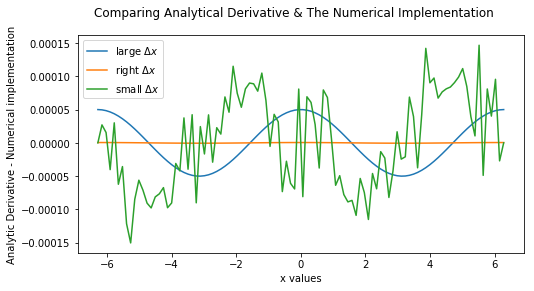

In [10]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)

df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)


plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical, label='large $\Delta x$')
plt.plot(xs, df_dx_2 - df_dx_analytical, label='right $\Delta x$')
plt.plot(xs, df_dx_3 - df_dx_analytical, label='small $\Delta x$')


plt.xlabel("x values")
plt.ylabel("Analytic Derivative - Numerical implementation")

plt.suptitle('Comparing Analytical Derivative & The Numerical Implementation')

plt.legend()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


The error estimate for the numerical method using the background difference is proportional to $\Delta x$. This can be found by Taylor expanding the equation and solving for the derivative. Therefore, when $\Delta x$ is too large, the numerical method loses accuracy as the large $\Delta x$ causes a large error.
In the case when $\Delta x$ is too small, the difference between the x and x-$\Delta x$ is so small that it leads to problems when combined with numbers with a large magnitude difference. The computer stores number with a finite precision due to the limited processing power and memory available, and therefore some details of the numbers involved in the calculation may be 'lost' during the calculation. This occurs when there is a large difference in the order of magnitude between two numbers being combined. This leads to some corruption, and the loss of information leads to the noisy difference between the analytic derivative and numerical implementation seen in the graph for a small $\Delta x$. The discrepancy is due to numerical round-off errors.